In [12]:
import os
import ccxt
from dotenv import load_dotenv
import pandas as pd
from datetime import datetime
load_dotenv()

True

In [13]:
API_KEY = os.getenv('BITGET_API_KEY')
SECRET_KEY = os.getenv('BITGET_SECRET_KEY')
PASSWORD = os.getenv('BITGET_PASSWORD')

# Initialize the Bitget exchange
bitget = ccxt.bitget({
    'apiKey': API_KEY,
    'secret': SECRET_KEY,
    'password': PASSWORD,
})

In [17]:
path = "/home/ubuntu/project/finance/cex-market-analysis/data/raw/bitget/XRP_USDT_1d.csv"
df = pd.read_csv(path)
df

,date,open,high,low,close,volume
0,2021-01-01,0.21928,0.25007,0.21599,0.23728,3.380855e+05
1,2021-01-02,0.23728,0.23816,0.21097,0.22104,2.145102e+05
2,2021-01-03,0.22104,0.23841,0.21523,0.22523,2.298213e+05
3,2021-01-04,0.22523,0.26020,0.21619,0.23570,3.507346e+05
4,2021-01-05,0.23570,0.24258,0.21774,0.22555,2.684389e+05
...,...,...,...,...,...,...
1095,2024-01-01,0.61549,0.63088,0.60840,0.62943,1.640395e+07
1096,2024-01-02,0.62943,0.64018,0.62135,0.62454,2.070212e+07
1097,2024-01-03,0.62454,0.63925,0.47305,0.58227,5.149048e+07
1098,2024-01-04,0.58227,0.59375,0.56951,0.58675,3.267217e+07


In [19]:
df['upper_wick'] = df['high'] - df[['open', 'close']].max(axis=1)
df.head()

,date,open,high,low,close,volume,upper_wick
0,2021-01-01,0.21928,0.25007,0.21599,0.23728,338085.5124,0.01279
1,2021-01-02,0.23728,0.23816,0.21097,0.22104,214510.1764,0.00088
2,2021-01-03,0.22104,0.23841,0.21523,0.22523,229821.2668,0.01318
3,2021-01-04,0.22523,0.26020,0.21619,0.23570,350734.5599,0.02450
4,2021-01-05,0.23570,0.24258,0.21774,0.22555,268438.8999,0.00688


In [20]:
# Count the days where the wick is greater than zero
days_with_positive_wick = df[df['upper_wick'] > 0].shape[0]

print(f"Number of days with a wick greater than zero: {days_with_positive_wick}")

Number of days with a wick greater than zero: 1088


In [21]:
df['upper_wick_pct'] = ((df['high'] - df['close']) / df['close']) * 100

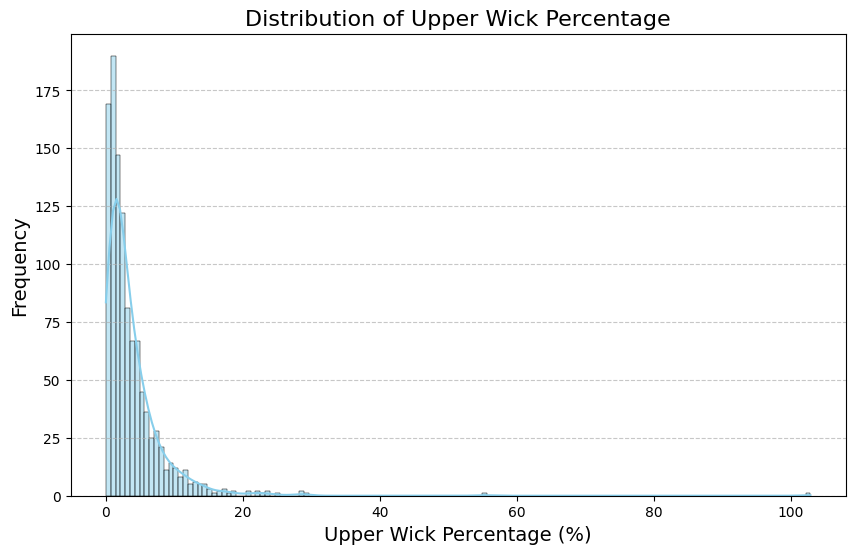

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution of upper_wick_pct
plt.figure(figsize=(10, 6))
sns.histplot(df['upper_wick_pct'], kde=True, color='skyblue')
plt.title('Distribution of Upper Wick Percentage', fontsize=16)
plt.xlabel('Upper Wick Percentage (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
df['upper_wick'][df['close'] <  df['open']]

1       0.00088
4       0.00688
7       0.02276
9       0.04286
10      0.00126
         ...   
1093    0.00687
1094    0.00767
1096    0.01075
1097    0.01471
1099    0.00179
Name: upper_wick, Length: 543, dtype: float64

In [25]:
import plotly.graph_objects as go
# Create a candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df['date'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    increasing_line_color='green',  # Green for price increase
    decreasing_line_color='red',    # Red for price decrease
)])
# Customize layout
fig.update_layout(
    title='Candlestick Chart of Price',
    xaxis_title='Date',
    yaxis_title='Price (USDT)',
    template='plotly_dark',  # Set a dark theme for the plot
    xaxis_rangeslider_visible=False  # Optionally hide the range slider
)

# Show the plot
fig.show()